In [48]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


Load the dataset 

In [49]:
# load dataset titanic
df = sns.load_dataset('titanic')

Start by data exploration, and printing data to have a better understanding of it. 

In [50]:
print(df)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [51]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Get the data's col vs row number

In [52]:
print(df.shape)

(891, 15)


Statistical describtions of the numerical columns.   

In [53]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


General understanding of the data structure.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


visualisation of a set of features against the survival feature.

- female survival is higher than men
- class 1 and 2 is high in comparison with class 1 with very low survival rate


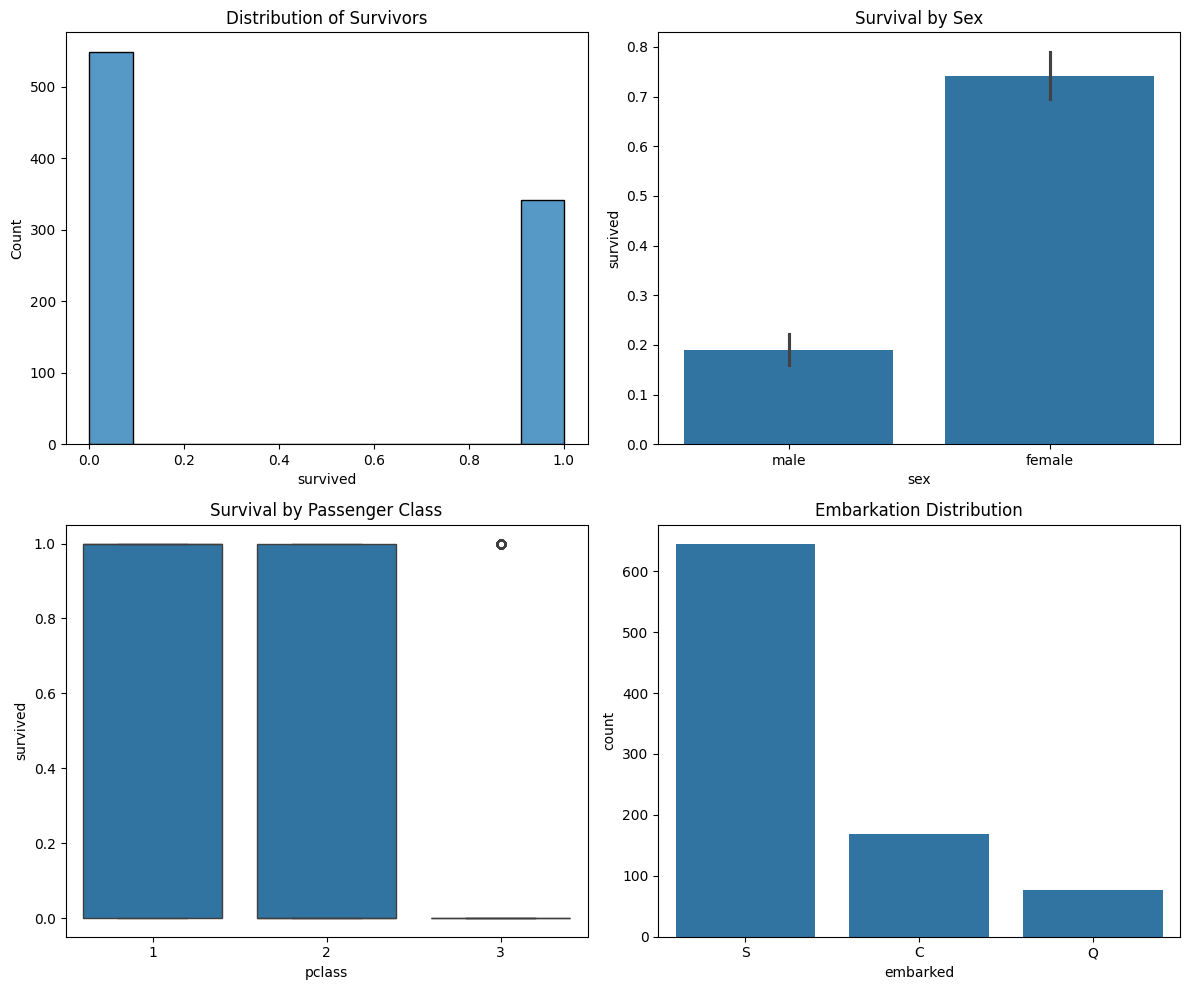

In [55]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Distribution of survivors
sns.histplot(df['survived'], ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Survivors')

# Survival by sex
sns.barplot(x='sex', y='survived', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Survival by Sex')

# Survival by passenger class
sns.boxplot(x='pclass', y='survived', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Survival by Passenger Class')

# Embarkation distribution
sns.countplot(x='embarked', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Embarkation Distribution')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Printing the missing values to further evaluate the dataset.

In [56]:

missing_values_count = df.isnull().sum()
print(missing_values_count)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


Identify potential outliers using the interquartile range (IQR) method.
For numerical features.

In [57]:


columns = ['survived', 'pclass', 'age', 'sibsp', 'fare']

# Loop through each column and compute percentiles and IQR
for column in columns:
    # Compute percentiles
    percentile_25 = df[column].quantile(0.25)
    percentile_75 = df[column].quantile(0.75)

    print("Column:", column)
    print("25th Percentile:", percentile_25)
    print("75th Percentile:", percentile_75)

    # Compute interquartile range (IQR)
    iqr = percentile_75 - percentile_25
    print("Interquartile Range (IQR):", iqr)
    print()


Column: survived
25th Percentile: 0.0
75th Percentile: 1.0
Interquartile Range (IQR): 1.0

Column: pclass
25th Percentile: 2.0
75th Percentile: 3.0
Interquartile Range (IQR): 1.0

Column: age
25th Percentile: 20.125
75th Percentile: 38.0
Interquartile Range (IQR): 17.875

Column: sibsp
25th Percentile: 0.0
75th Percentile: 1.0
Interquartile Range (IQR): 1.0

Column: fare
25th Percentile: 7.9104
75th Percentile: 31.0
Interquartile Range (IQR): 23.0896



Number of missing values, as well as the percentage.

In [58]:
print(df.isnull().any(axis=1).sum())
print(100*df.isnull().any(axis=1).sum()/df.shape[0],'%')

709
79.57351290684625 %


In [59]:
df[df.isnull().any(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


Check for any missing rows.

In [60]:
print(f"Number of empty records = {df.isnull().all(axis=1).sum()}")
df[df.isnull().all(axis=1)]


Number of empty records = 0


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


Missing values from each feature, as well as the percentage of misses.

In [61]:
print(f"The number of records where deck is missing equals {df.isnull()['deck'].sum()}")
print(f"The proportion of records where deck is missing equals {100*df.isnull()['deck'].sum()/df.shape[0]}%")

print(f"The number of records where age is missing equals {df.isnull()['age'].sum()}")
print(f"The proportion of records where age is missing equals {100*df.isnull()['age'].sum()/df.shape[0]}%")

print(f"The number of records where embarked is missing equals {df.isnull()['embarked'].sum()}")
print(f"The proportion of records where embarked is missing equals {100*df.isnull()['embarked'].sum()/df.shape[0]}%")

print(f"The number of records where embark_town is missing equals {df.isnull()['embark_town'].sum()}")
print(f"The proportion of records where embark_town is missing equals {100*df.isnull()['embark_town'].sum()/df.shape[0]}%")

The number of records where deck is missing equals 688
The proportion of records where deck is missing equals 77.21661054994388%
The number of records where age is missing equals 177
The proportion of records where age is missing equals 19.865319865319865%
The number of records where embarked is missing equals 2
The proportion of records where embarked is missing equals 0.2244668911335578%
The number of records where embark_town is missing equals 2
The proportion of records where embark_town is missing equals 0.2244668911335578%


Dealing with the missing values, embark_town/embarked missing data is so small so either drop them or impute
(missing data in embarked and embark_town are in the same row).
Here they will be droped.

In [62]:

df.dropna(subset='embark_town', inplace=True)
df.dropna(subset='embarked', inplace=True)

print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64


Plot age, to detect outliers.

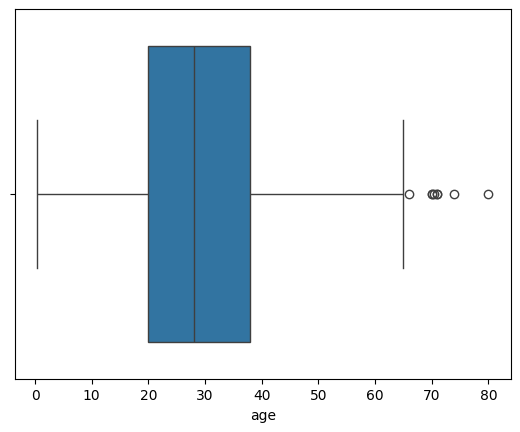

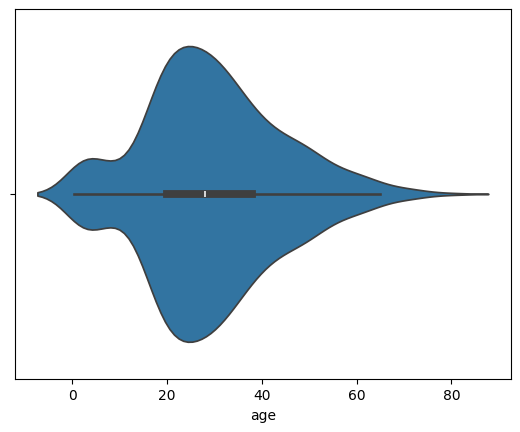

In [63]:
sns.boxplot(x = "age", data = df)
plt.show()
sns.violinplot(x = "age", data = df)
plt.show()


Impute age with median.

In [64]:
# Impute missing 'age' values with median
median_age = df['age'].median()
df['age'].fillna(median_age, inplace=True)

In [65]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64


Imputation caused more outliers. 

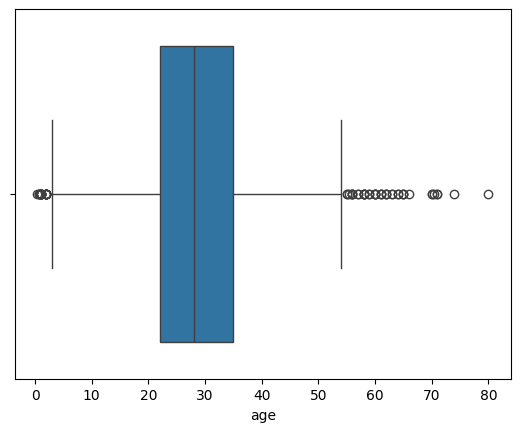

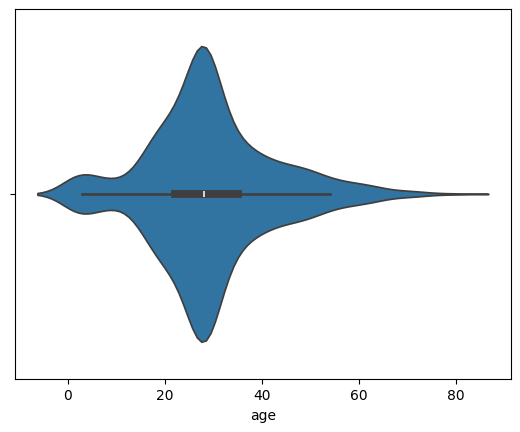

In [66]:
sns.boxplot(x = "age", data = df)
plt.show()
sns.violinplot(x = "age", data = df)
plt.show()


Deck feature will be droped due to the very high number of missing value thats more than 70% of the whole feature, as well as the smaller impact it has on the data.

In [67]:
# Assuming you have loaded your data into a DataFrame named 'df'
df.drop('deck', axis=1, inplace=True)


In [68]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

Detecting outliers after dealing with the missing values. Using IQR.

In [69]:


columns = ['survived', 'pclass', 'age', 'sibsp', 'fare']

# Loop through each column and compute percentiles and IQR
for column in columns:
    # Compute percentiles
    percentile_25 = df[column].quantile(0.25)
    percentile_75 = df[column].quantile(0.75)

    print("Column:", column)
    print("25th Percentile:", percentile_25)
    print("75th Percentile:", percentile_75)

    # Compute interquartile range (IQR)
    iqr = percentile_75 - percentile_25
    print("Interquartile Range (IQR):", iqr)
    print()


Column: survived
25th Percentile: 0.0
75th Percentile: 1.0
Interquartile Range (IQR): 1.0

Column: pclass
25th Percentile: 2.0
75th Percentile: 3.0
Interquartile Range (IQR): 1.0

Column: age
25th Percentile: 22.0
75th Percentile: 35.0
Interquartile Range (IQR): 13.0

Column: sibsp
25th Percentile: 0.0
75th Percentile: 1.0
Interquartile Range (IQR): 1.0

Column: fare
25th Percentile: 7.8958
75th Percentile: 31.0
Interquartile Range (IQR): 23.1042



Age caused an increase of outliers, will be further analyzing it.

In [70]:
print(f"Minimum Age in Years ~ {(df['age'].min() )}")
print(f"Maximum Age in Years ~ {(df['age'].max())}")
print(f"Mean Age in Years ~ {(df['age'].mean() )}")

Minimum Age in Years ~ 0.42
Maximum Age in Years ~ 80.0
Mean Age in Years ~ 29.315151856017994


In [71]:
# Compute percentiles using Pandas quantile() function
percentile_25 = df['age'].quantile(0.25)
percentile_50 = df['age'].quantile(0.5)
percentile_75 = df['age'].quantile(0.75)

print("25th Percentile:", percentile_25)
print("50th Percentile:", percentile_50)
print("75th Percentile:", percentile_75) 

# Compute interquartile range (IQR)
iqr = percentile_75 - percentile_25
print("Interquartile Range (IQR):", iqr)

LowerBound_age = percentile_25 - 1.5*iqr
UpperBound_age = percentile_75 + 1.5*iqr
print(f"Lower Bound = {LowerBound_age}, and Upper Bound = {UpperBound_age}")

25th Percentile: 22.0
50th Percentile: 28.0
75th Percentile: 35.0
Interquartile Range (IQR): 13.0
Lower Bound = 2.5, and Upper Bound = 54.5


In [72]:
NumRecordsBefore=df.shape[0]
DroppedRecords=df[(df['age'] < LowerBound_age) | (df['age'] > UpperBound_age)].shape[0]
print(f"Number of outliers based on the Interquartile Range and Boxplots is {DroppedRecords} ({100*DroppedRecords/NumRecordsBefore}%)")

Number of outliers based on the Interquartile Range and Boxplots is 65 (7.311586051743532%)


Handling outliers in the age feature.

In [73]:
Q1 = 22.0  # 25th percentile
Q3 = 35.0  # 75th percentile
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["age"] = np.clip(df["age"], lower_bound, upper_bound)


Now less outliers.

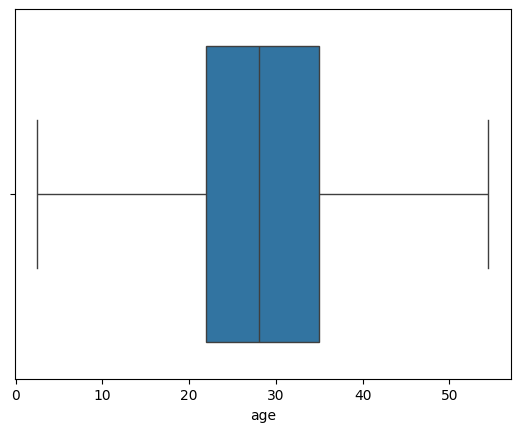

In [74]:
sns.boxplot(x = "age", data = df)
plt.show()


In [75]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [76]:
NumRecordsBefore=df.shape[0]
DroppedRecords=df[(df['age'] < LowerBound_age) | (df['age'] > UpperBound_age)].shape[0]
print(f"Number of outliers based on the Interquartile Range and Boxplots is {DroppedRecords} ({100*DroppedRecords/NumRecordsBefore}%)")

Number of outliers based on the Interquartile Range and Boxplots is 0 (0.0%)


Handling all possible outliers

In [77]:
def detect_outliers_and_clip(df):
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Call the function to detect outliers and clip values for all numerical columns
df = detect_outliers_and_clip(df)

Using One hot encoding to encode catagorical features into numerical format suitable for machine learning models.

In [78]:
import pandas as pd

categorical_features = df.drop('survived', axis=1).select_dtypes(include=['object'])  # Select categorical features

# One-hot encode the categorical features
df_encoded = pd.concat([df, pd.get_dummies(categorical_features, dtype=int)], axis=1)

# Drop the original categorical features
df_encoded.drop(categorical_features.columns, axis=1, inplace=True)
df_encoded.drop('class', axis=1, inplace=True)
df_encoded.drop('adult_male', axis=1, inplace=True)
df_encoded.drop('alone', axis=1, inplace=True)


print(df_encoded.head())  # View the first few rows of the encoded DataFrame


   survived  pclass   age  sibsp  parch     fare  sex_female  sex_male  \
0         0       3  22.0    1.0      0   7.2500           0         1   
1         1       1  38.0    1.0      0  65.6563           1         0   
2         1       3  26.0    0.0      0   7.9250           1         0   
3         1       1  35.0    1.0      0  53.1000           1         0   
4         0       3  35.0    0.0      0   8.0500           0         1   

   embarked_C  embarked_Q  embarked_S  who_child  who_man  who_woman  \
0           0           0           1          0        1          0   
1           1           0           0          0        0          1   
2           0           0           1          0        0          1   
3           0           0           1          0        0          1   
4           0           0           1          0        1          0   

   embark_town_Cherbourg  embark_town_Queenstown  embark_town_Southampton  \
0                      0                     

In [79]:
df_encoded.isnull().sum()

survived                   0
pclass                     0
age                        0
sibsp                      0
parch                      0
fare                       0
sex_female                 0
sex_male                   0
embarked_C                 0
embarked_Q                 0
embarked_S                 0
who_child                  0
who_man                    0
who_woman                  0
embark_town_Cherbourg      0
embark_town_Queenstown     0
embark_town_Southampton    0
alive_no                   0
alive_yes                  0
dtype: int64

In [80]:
df_encoded.head()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
0,0,3,22.0,1.0,0,7.2500,0,1,0,0,1,0,1,0,0,0,1,1,0
1,1,1,38.0,1.0,0,65.6563,1,0,1,0,0,0,0,1,1,0,0,0,1
2,1,3,26.0,0.0,0,7.9250,1,0,0,0,1,0,0,1,0,0,1,0,1
3,1,1,35.0,1.0,0,53.1000,1,0,0,0,1,0,0,1,0,0,1,0,1
4,0,3,35.0,0.0,0,8.0500,0,1,0,0,1,0,1,0,0,0,1,1,0


Features relevance.

In [81]:
from sklearn.feature_selection import SelectKBest, f_regression


# Define the target variable (assuming "survived")
target_col = "survived"

# Create a SelectKBest selector with f_regression for information gain
selector = SelectKBest(score_func=f_regression, k=10)  # Select top 10 features

# Fit the selector to the data and target variable
selector.fit(df_encoded, df_encoded[target_col])

# Get the scores for each feature
feature_scores = selector.scores_

# Get the feature names
feature_names = df_encoded.columns.tolist()  # Assuming column names are strings

# Print feature names and their corresponding scores (sorted by score in descending order)
sorted_features = sorted(zip(feature_names, feature_scores), key=lambda x: x[1], reverse=True)
for feature, score in sorted_features:
    print(f"{feature}: {score:.4f}")


alive_no: 114134081985074256.0000
who_man: 395.9097
sex_female: 368.1547
sex_male: 368.1547
who_woman: 302.7731
pclass: 112.5414
fare: 96.7864
embarked_C: 26.3863
embark_town_Cherbourg: 26.3863
embarked_S: 20.9150
embark_town_Southampton: 20.9150
who_child: 17.0384
age: 3.7621
sibsp: 0.9802
embarked_Q: 0.0182
embark_town_Queenstown: 0.0182
parch: 0.0000
survived: -249668304342352768.0000
alive_yes: -249668304342352768.0000


In [82]:
df_encoded.describe()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
count,889.000000,889.000000,889.000000,889.000000,889.0,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.000562,0.427447,0.0,23.956061,0.350956,0.649044,0.188976,0.086614,0.724409,0.093363,0.604049,0.302587,0.188976,0.086614,0.724409,0.617548,0.382452
std,0.486260,0.834700,12.051609,0.708753,0.0,20.414997,0.477538,0.477538,0.391710,0.281427,0.447063,0.291105,0.489329,0.459637,0.391710,0.281427,0.447063,0.486260,0.486260
min,0.000000,1.000000,2.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.0,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.0,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.0,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,54.500000,2.500000,0.0,65.656300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Drop least relevent features.

In [83]:
# Define the least relevant features to drop
features_to_drop = [  'sibsp', 'embarked_Q', 'embark_town_Queenstown', 
                     'alive_yes']

# Drop the least relevant features from the DataFrame
df_encoded = df_encoded.drop(columns=features_to_drop)

# Display the resulting DataFrame after dropping the features
print(df_encoded.head())


   survived  pclass   age  parch     fare  sex_female  sex_male  embarked_C  \
0         0       3  22.0      0   7.2500           0         1           0   
1         1       1  38.0      0  65.6563           1         0           1   
2         1       3  26.0      0   7.9250           1         0           0   
3         1       1  35.0      0  53.1000           1         0           0   
4         0       3  35.0      0   8.0500           0         1           0   

   embarked_S  who_child  who_man  who_woman  embark_town_Cherbourg  \
0           1          0        1          0                      0   
1           0          0        0          1                      1   
2           1          0        0          1                      0   
3           1          0        0          1                      0   
4           1          0        1          0                      0   

   embark_town_Southampton  alive_no  
0                        1         1  
1                   

Split the dataset.

In [84]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df_encoded.drop('survived', axis=1)  # Features (predictors)
y = df_encoded['survived']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scale the needed features.

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_to_scale = ['age', 'fare','parch','pclass']
scaler.fit(X_train[features_to_scale])
# Transform (scale) the training and testing data for the chosen features
X_train[features_to_scale] = scaler.transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

X_train.describe()


,pclass,age,parch,fare,sex_female,sex_male,embarked_C,embarked_S,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Southampton,alive_no
count,711.000000,711.000000,711.0,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,0.661041,0.513402,0.0,0.364454,0.336146,0.663854,0.185654,0.722925,0.094233,0.611814,0.293952,0.185654,0.722925,0.618847
std,0.417590,0.234675,0.0,0.310445,0.472722,0.472722,0.389101,0.447869,0.292359,0.487680,0.455891,0.389101,0.447869,0.486012
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.375000,0.0,0.120260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.490385,0.0,0.220847,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,0.644231,0.0,0.467523,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


visualise the features before and after scalling.

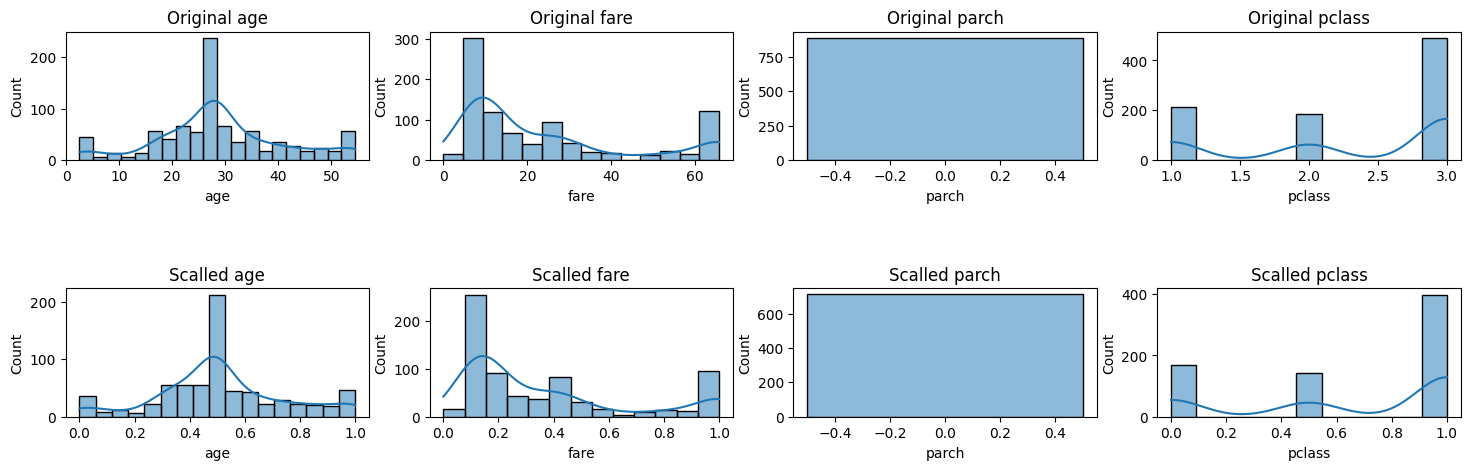

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(figsize=(18, 5),ncols=4,nrows=2)

sns.histplot(data=df, x="age", ax=axs[0,0], kde=True);axs[0,0].set_title(f"Original age")
sns.histplot(data=df, x="fare", ax=axs[0,1], kde=True);axs[0,1].set_title(f"Original fare")
sns.histplot(data=df, x="parch", ax=axs[0,2], kde=True);axs[0,2].set_title(f"Original parch")
sns.histplot(data=df, x="pclass", ax=axs[0,3], kde=True);axs[0,3].set_title(f"Original pclass")

sns.histplot(data=X_train, x="age", ax=axs[1,0], kde=True);axs[1,0].set_title(f"Scalled age")
sns.histplot(data=X_train, x="fare", ax=axs[1,1], kde=True);axs[1,1].set_title(f"Scalled fare")
sns.histplot(data=X_train, x="parch", ax=axs[1,2], kde=True);axs[1,2].set_title(f"Scalled parch")
sns.histplot(data=X_train, x="pclass", ax=axs[1,3], kde=True);axs[1,3].set_title(f"Scalled pclass")

fig.subplots_adjust(hspace=1)

Principal Component Analysis (PCA) as a suitable dimensionality reduction.

In [87]:
# # Import the PCA module from scikit-learn
# from sklearn.decomposition import PCA

# # Create an instance of PCA with n_components set to 4
# pca = PCA(n_components=5)

# # Fit the PCA model on the data (assuming 'df' contains your dataset)
# pca.fit(X_train)

# # Print the explained variance ratio for each selected component
# print(f"Explained variance ratio for each PCA component are {pca.explained_variance_ratio_}")

# # Transform the original DataFrame 'df' using PCA
# Array_PCA = pca.transform(X_train)
# X_test_pca = pca.transform(X_test)  # Apply PCA to testing set using fitted model

# # Create a new DataFrame 'df_PCA' from the transformed data
# df_PCA = pd.DataFrame(Array_PCA)

# # Display the first few rows of the new DataFrame
# df_PCA.head()

In [88]:
# Import the PCA module from scikit-learn
from sklearn.decomposition import PCA

# Create an instance of PCA with n_components set to 4
pca = PCA(n_components=10)

# Fit the PCA model on the data (assuming 'df' contains your dataset)
pca.fit(X_train)

# Print the explained variance ratio for each selected component
print(f"Explained variance ratio for each PCA component are {pca.explained_variance_ratio_}")

# Transform the original DataFrame 'df' using PCA
Array_PCA = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a new DataFrame 'df_PCA' from the transformed data
df_PCA = pd.DataFrame(Array_PCA)

# Display the first few rows of the new DataFrame
df_PCA.head()

Explained variance ratio for each PCA component are [4.26652677e-01 2.70346391e-01 1.14846206e-01 7.17007902e-02
 5.09033531e-02 2.99566001e-02 1.49300970e-02 1.10987196e-02
 9.56516587e-03 1.34424578e-34]


,0,1,2,3,4,5,6,7,8,9
0,1.380127,-0.782125,0.759490,0.016954,-0.140735,0.132204,0.220195,-0.221003,0.020103,1.301689e-16
1,1.411877,1.004697,-0.858693,-0.595185,-0.420816,-0.364439,0.002271,-0.008066,-0.108660,6.323330e-17
2,-0.927959,-0.260810,-0.223410,-0.122656,0.066420,-0.124412,0.014448,0.051602,0.009151,-4.952373e-17
3,0.933829,-0.841575,-0.268680,-0.470028,-0.618185,0.011733,0.608615,0.121112,0.097100,2.835432e-16
4,-0.378649,-0.413855,-0.360002,0.876739,-0.822566,0.188052,0.247114,0.318840,-0.331613,-2.176815e-17


visualise before and after PCA. 

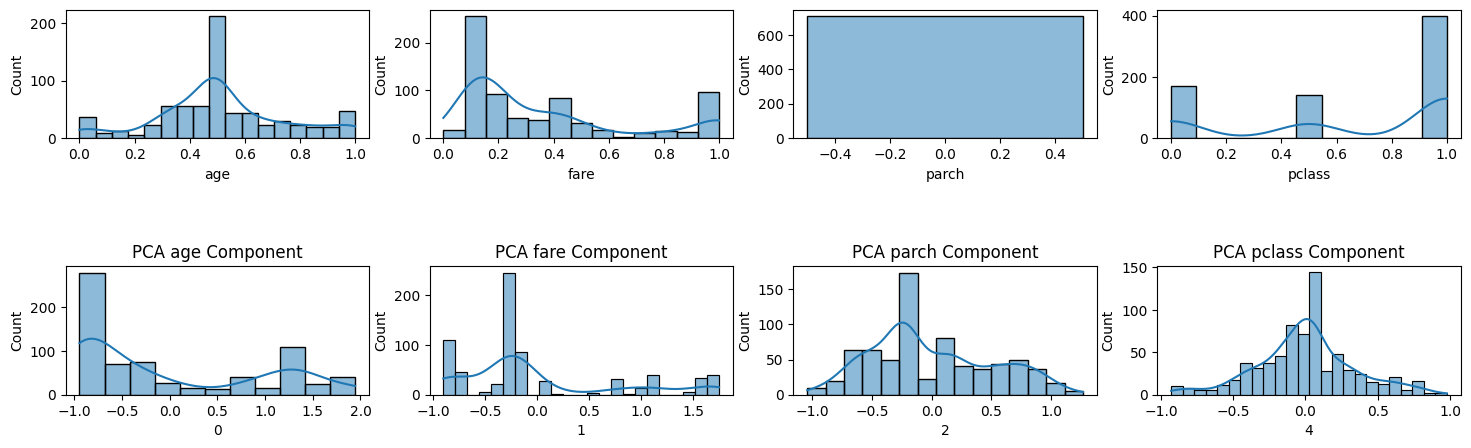

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(figsize=(18, 5),ncols=4,nrows=2)


sns.histplot(data=X_train, x="age", ax=axs[0,0], kde=True);axs[1,0].set_title(f"Scalled age")
sns.histplot(data=X_train, x="fare", ax=axs[0,1], kde=True);axs[1,1].set_title(f"Scalled fare")
sns.histplot(data=X_train, x="parch", ax=axs[0,2], kde=True);axs[1,2].set_title(f"Scalled parch")
sns.histplot(data=X_train, x="pclass", ax=axs[0,3], kde=True);axs[1,3].set_title(f"Scalled pclass")


sns.histplot(data=df_PCA, x=0, ax=axs[1,0], kde=True);axs[1,0].set_title(f"PCA age Component")
sns.histplot(data=df_PCA, x=1, ax=axs[1,1], kde=True);axs[1,1].set_title(f"PCA fare Component")
sns.histplot(data=df_PCA, x=2, ax=axs[1,2], kde=True);axs[1,2].set_title(f"PCA parch Component")
sns.histplot(data=df_PCA, x=4, ax=axs[1,3], kde=True);axs[1,3].set_title(f"PCA pclass Component")

fig.subplots_adjust(hspace=1)

In [90]:

# Model with PCA components:
clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(Array_PCA, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Explained variance ratio for each PCA component: {pca.explained_variance_ratio_}")
print(f"Number of original features: {X_train.shape[1]}")
print(f"Number of features retained after PCA: {Array_PCA.shape[1]}")


Explained variance ratio for each PCA component: [4.26652677e-01 2.70346391e-01 1.14846206e-01 7.17007902e-02
 5.09033531e-02 2.99566001e-02 1.49300970e-02 1.10987196e-02
 9.56516587e-03 1.34424578e-34]
Number of original features: 14
Number of features retained after PCA: 10


In [91]:

# Model with PCA components:
clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(Array_PCA, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy with PCA components using Random Forest: {accuracy_pca}")


Accuracy with PCA components using Random Forest: 1.0


Model training comparison between preprocessed data and unprocessed data.
- Shows the positive difference data preprocessing make with model training.

SVM is sensitive to feature scaling and can be affected by outliers, so preprocessing steps like scaling and outlier removal have a pronounced impact on its performance.

In [92]:
or_df = sns.load_dataset('titanic')
# Split the data into training and testing sets
or_X = df_encoded.drop('survived', axis=1)  # Features (predictors)
or_y = df_encoded['survived']  # Target variable

or_X_train, or_X_test, or_y_train, or_y_test = train_test_split(or_X, or_y, test_size=0.2, random_state=42)
# Model with original features
clf_original = SVC(random_state=42)
clf_original.fit(or_X_train, or_y_train)
y_pred_original = clf_original.predict(or_X_test)
accuracy_original = accuracy_score(or_y_test, y_pred_original)

# Model with PCA components
clf_pca = SVC(random_state=42)
clf_pca.fit(Array_PCA, y_train)  # Note: Use PCA-transformed training data
y_pred_pca = clf_pca.predict(X_test_pca)  # Note: Use PCA-transformed test data
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# Print results
print(f"Accuracy with original features (SVM): {accuracy_original}")
print(f"Accuracy with PCA components (SVM): {accuracy_pca}")


Accuracy with original features (SVM): 0.7191011235955056
Accuracy with PCA components (SVM): 1.0


Evaluation Metrics for Model performance comparison on processed and unprocessed data.

In [93]:

# Compute evaluation metrics for the model with original features
accuracy_original = accuracy_score(or_y_test, y_pred_original)
precision_original = precision_score(or_y_test, y_pred_original)
recall_original = recall_score(or_y_test, y_pred_original)
f1_original = f1_score(or_y_test, y_pred_original)
roc_auc_original = roc_auc_score(or_y_test, y_pred_original)

# Compute evaluation metrics for the model with PCA components
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)
roc_auc_pca = roc_auc_score(y_test, y_pred_pca)

# Print results
print("Evaluation Metrics for Model with Original Features:")
print(f"Accuracy: {accuracy_original:.4f}")
print(f"Precision: {precision_original:.4f}")
print(f"Recall: {recall_original:.4f}")
print(f"F1-score: {f1_original:.4f}")
print(f"ROC-AUC score: {roc_auc_original:.4f}")
print()
print("Evaluation Metrics for Model with PCA Components:")
print(f"Accuracy: {accuracy_pca:.4f}")
print(f"Precision: {precision_pca:.4f}")
print(f"Recall: {recall_pca:.4f}")
print(f"F1-score: {f1_pca:.4f}")
print(f"ROC-AUC score: {roc_auc_pca:.4f}")


Evaluation Metrics for Model with Original Features:
Accuracy: 0.7191
Precision: 0.7317
Recall: 0.4348
F1-score: 0.5455
ROC-AUC score: 0.6669

Evaluation Metrics for Model with PCA Components:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
ROC-AUC score: 1.0000
